## 

# Tải tập dữ liệu

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn dataset
DATASET_PATH = "alola"
TRAIN_PATH = os.path.join(DATASET_PATH, "train/train")  # Dữ liệu huấn luyện
TEST_PATH = os.path.join(DATASET_PATH, "test/test")  # Dữ liệu kiểm tra

# Kiểm tra số lượng loại trái cây
categories = os.listdir(TRAIN_PATH)
print(f"Dataset có {len(categories)} loại trái cây.")


Dataset có 33 loại trái cây.


# Xử lý dữ liệu & Tăng cường

In [5]:
# Kích thước ảnh đầu vào
IMG_SIZE = (100, 100)
BATCH_SIZE = 32

# Tạo Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa ảnh về 0-1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Chia 20% dữ liệu làm tập validation
)

# Load dữ liệu từ thư mục train
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Chọn tập train
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Chọn tập validation
)

# Số lượng lớp (loại trái cây)
num_classes = len(train_generator.class_indices)
print(f"Số lớp: {num_classes}")


Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.
Số lớp: 33


# Xây dựng mô hình CNN
3 tầng Conv2D , MaxPooling2D và một tầng Complete Connected ở cuối.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Giảm overfitting
    Dense(num_classes, activation='softmax')  # Lớp đầu ra
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Hiển thị kiến trúc mô hình
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 33)             │        16,929 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,664,289 (25.42 MB)

 Trainable params: 6,664,289 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

# Huấn luyện mô hình
Sử dụng Adam Optimizer và function loss categorical_crossentropy .

Chạy 10 kỷ nguyên để mô hình hóa bài học từ dữ liệu.

In [39]:
EPOCHS = 50  # Số lần lặp qua dữ liệu

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 140s 330ms/step - accuracy: 0.4203 - loss: 1.8829 - val_accuracy: 0.9003 - val_loss: 0.2680
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 121s 287ms/step - accuracy: 0.8883 - loss: 0.3111 - val_accuracy: 0.9518 - val_loss: 0.1359
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 124s 293ms/step - accuracy: 0.9303 - loss: 0.1968 - val_accuracy: 0.9747 - val_loss: 0.0640
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 123s 291ms/step - accuracy: 0.9588 - loss: 0.1177 - val_accuracy: 0.9920 - val_loss: 0.0313
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 122s 289ms/step - accuracy: 0.9751 - loss: 0.0764 - val_accuracy: 0.9714 - val_loss: 0.0701
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 133s 315ms/step - accuracy: 0.9627 - loss: 0.1186 - val_accuracy: 0.9821 - val_loss: 0.0474
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 123s 291ms/step - accuracy: 0.9747 - loss: 0.0776 - val_accuracy: 0.9935 - val_loss: 0.0210
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 123s 291ms/step - accuracy: 0.9806 -

# Lưu dữ liệu huấn luyện

In [40]:
import json

with open("training_history.json", "w") as f:
    json.dump(history.history, f)

# Vẽ biểu đồ về độ chính xác và độ mất để kiểm tra hiệu suất của mô hình.

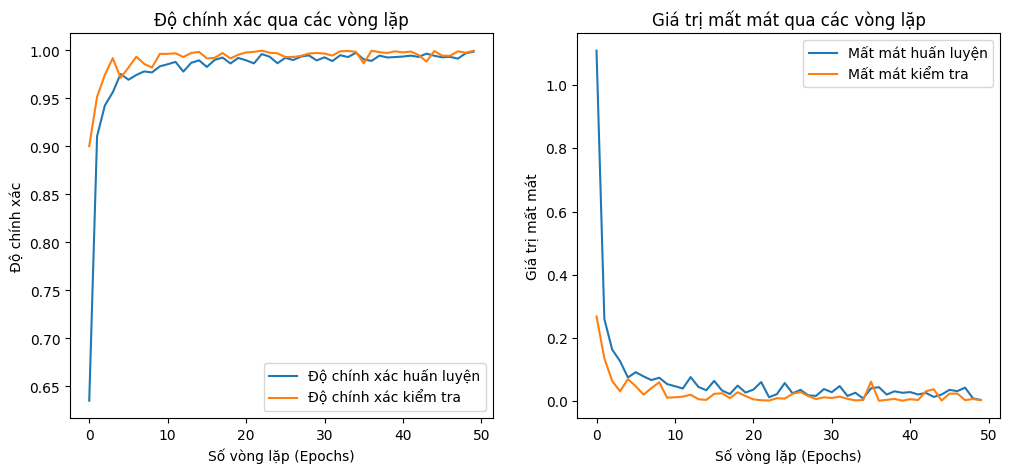

In [41]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# Vẽ biểu đồ Độ chính xác
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm tra')
plt.xlabel('Số vòng lặp (Epochs)')
plt.ylabel('Độ chính xác')
plt.legend()
plt.title('Độ chính xác qua các vòng lặp')

# Vẽ biểu đồ Mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Mất mát kiểm tra')
plt.xlabel('Số vòng lặp (Epochs)')
plt.ylabel('Giá trị mất mát')
plt.legend()
plt.title('Giá trị mất mát qua các vòng lặp')

plt.show()


# Gọi dữ liệu huấn luyện đã được lưu

In [42]:
with open("training_history.json", "r") as f:
    history_loaded = json.load(f) 

# Dự đoán trên ảnh mới


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


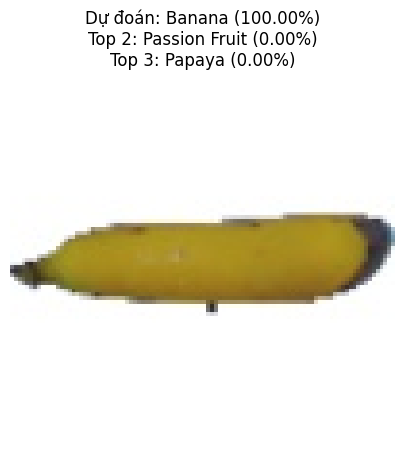

🔍 Kết quả dự đoán:
1. Banana - Xác suất: 100.00%
2. Passion Fruit - Xác suất: 0.00%
3. Papaya - Xác suất: 0.00%


In [44]:
import cv2
def predict_image(image_path, model, class_indices):
    # Kiểm tra ảnh có tồn tại không
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Lỗi: Không thể đọc ảnh từ đường dẫn {image_path}")
            return
    except Exception as e:
        print(f"Lỗi khi đọc ảnh: {e}")
        return
    # Chuyển BGR → RGB để hiển thị đúng màu
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    # Kiểm tra số kênh (tránh ảnh có kênh alpha)
    if img.shape[-1] == 4:  
        img = img[:, :, :3]  
    # Resize, chuẩn hóa ảnh
    img = cv2.resize(img, (100, 100))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    # Dự đoán
    prediction = model.predict(img)[0]  
    sorted_indices = np.argsort(prediction)[::-1]  # Sắp xếp theo xác suất giảm dần
    # Lấy nhãn từ class_indices
    class_labels = list(class_indices.keys())
    top3_labels = [class_labels[i] for i in sorted_indices[:3]]
    top3_probs = [prediction[i] * 100 for i in sorted_indices[:3]]  # Chuyển sang %
    # Hiển thị ảnh và kết quả dự đoán
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.imread(image_path)[..., ::-1])  # Đọc lại ảnh cho hiển thị đúng
    plt.title(f"Dự đoán: {top3_labels[0]} ({top3_probs[0]:.2f}%)\n"
              f"Top 2: {top3_labels[1]} ({top3_probs[1]:.2f}%)\n"
              f"Top 3: {top3_labels[2]} ({top3_probs[2]:.2f}%)",
              fontsize=12)
    plt.axis("off")
    plt.show()
    # In ra kết quả chi tiết
    print("🔍 Kết quả dự đoán:")
    for i in range(3):
        print(f"{i+1}. {top3_labels[i]} - Xác suất: {top3_probs[i]:.2f}%")
    # Cảnh báo nếu xác suất thấp
    if top3_probs[0] < 50:
        print("Cảnh báo: Mô hình không chắc chắn về dự đoán này!")
# Kiểm tra với một ảnh test trong aloha/test/test
test_image = "alola/test/test/0888.jpg"
predict_image(test_image, model, train_generator.class_indices)


# Lưu và tải mô hình

In [101]:
# Lưu mô hình dưới dạng .keras
model.save("fruit_classification_model.keras")

# Load lại mô hình khi cần sử dụng
from tensorflow.keras.models import load_model

duong_dan_mo_hinh = "fruit_classification_model.keras"  # Sử dụng đúng định dạng

# Kiểm tra xem tệp có tồn tại không trước khi load
import os
if os.path.exists(duong_dan_mo_hinh):
    try:
        loaded_model = load_model(duong_dan_mo_hinh)
        print("✅ Mô hình đã được load thành công!")
    except Exception as e:
        print(f"Lỗi khi load mô hình: {e}")
else:
    print(f"⚠️ Lỗi: Không tìm thấy tệp mô hình tại '{duong_dan_mo_hinh}'. Vui lòng kiểm tra lại đường dẫn!")


✅ Mô hình đã được load thành công!


In [102]:
from tensorflow.keras.models import load_model

# Load mô hình đã lưu
model = load_model("fruit_classification_model.keras")

# Dự đoán trên ảnh mới
import numpy as np
img = np.random.rand(1, 100, 100, 3)  # Ảnh giả lập (thay bằng ảnh thực tế)
prediction = model.predict(img)
print("🔍 Kết quả dự đoán:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
🔍 Kết quả dự đoán: [[3.8816347e-19 4.3551973e-24 1.6943531e-24 1.9810798e-25 5.2896020e-26
  8.5422673e-09 1.5551803e-26 8.0941414e-23 3.8445159e-18 1.0117538e-21
  2.7625445e-21 1.1244598e-21 4.0870921e-10 2.6459383e-31 2.2330808e-24
  3.2945577e-23 1.1391140e-19 6.9761269e-29 1.4600904e-22 3.8933678e-25
  1.1550815e-11 9.9489733e-24 5.4729313e-14 3.5054940e-19 1.4765979e-10
  7.9723527e-18 5.8341403e-08 3.9617944e-12 7.3592402e-22 1.0000000e+00
  1.0749654e-15 4.0818284e-20 1.0351514e-19]]


# Tỉ lệ tập Test và Train

In [ ]:
# Đường dẫn đến thư mục dataset
train_dir = "alola/train/train"  
test_dir = "alola/test/test"  

# Đếm số lượng ảnh trong từng thư mục
num_train_images = sum([len(files) for _, _, files in os.walk(train_dir)])
num_test_images = sum([len(files) for _, _, files in os.walk(test_dir)])

# Tính tỷ lệ phần trăm
total_images = num_train_images + num_test_images
train_ratio = (num_train_images / total_images) * 100
test_ratio = (num_test_images / total_images) * 100

print(f"📂 Số ảnh trong tập Train: {num_train_images}")
print(f"📂 Số ảnh trong tập Test: {num_test_images}")
print(f"📊 Tỷ lệ Train: {train_ratio:.2f}%")
print(f"📊 Tỷ lệ Test: {test_ratio:.2f}%")


📂 Số ảnh trong tập Train: 16854
📂 Số ảnh trong tập Test: 5641
📊 Tỷ lệ Train: 74.92%
📊 Tỷ lệ Test: 25.08%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


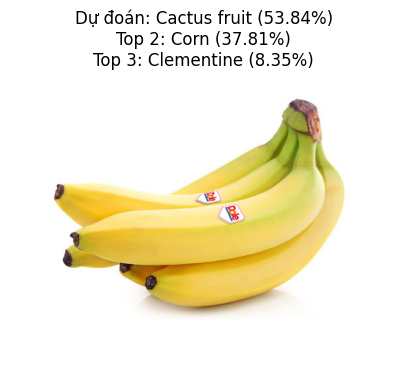

🔍 Kết quả dự đoán:
1. Cactus fruit - Xác suất: 53.84%
2. Corn - Xác suất: 37.81%
3. Clementine - Xác suất: 8.35%


In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Không thể đọc ảnh: {image_path}")
        return None

    # Chuyển về không gian màu RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Điều chỉnh độ sáng
    img = cv2.convertScaleAbs(img, alpha=1.2, beta=10)

    # Chuẩn hóa histogram (cân bằng ánh sáng)
    for i in range(3):  
        img[:, :, i] = cv2.equalizeHist(img[:, :, i])

    # Resize về kích thước chuẩn
    img = cv2.resize(img, (100, 100)) / 255.0  # Chuẩn hóa về 0-1
    img = np.expand_dims(img, axis=0)  # Thêm batch dimension
    return img

def predict_custom_image(image_path, model, class_indices):
    img = preprocess_image(image_path)
    if img is None:
        return

    # Dự đoán
    prediction = model.predict(img)[0]
    sorted_indices = np.argsort(prediction)[::-1]

    # Lấy nhãn và xác suất
    class_labels = list(class_indices.keys())
    top_labels = [class_labels[i] for i in sorted_indices[:3]]
    top_probs = [prediction[i] * 100 for i in sorted_indices[:3]]

    # Hiển thị kết quả
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.imread(image_path)[..., ::-1])  
    plt.title(f"Dự đoán: {top_labels[0]} ({top_probs[0]:.2f}%)\n"
              f"Top 2: {top_labels[1]} ({top_probs[1]:.2f}%)\n"
              f"Top 3: {top_labels[2]} ({top_probs[2]:.2f}%)",
              fontsize=12)
    plt.axis("off")
    plt.show()

    # In kết quả ra console
    print("🔍 Kết quả dự đoán:")
    for i in range(3):
        print(f"{i+1}. {top_labels[i]} - Xác suất: {top_probs[i]:.2f}%")

    # Cảnh báo nếu xác suất thấp
    if top_probs[0] < 50:
        print("⚠️ Cảnh báo: Mô hình không chắc chắn về dự đoán này!")

# Dự đoán với ảnh tải từ Google
custom_image = "google_images/banana.jpg"  
predict_custom_image(custom_image, model, train_generator.class_indices)
